In [1]:
import path_configs # noqa
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import settings
settings.init()
from modules.EncoderGenerators import * # noqa

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# assumes that array is not zero
def scaled(tensor):
    return (tensor-tf.math.reduce_min(tensor))/(tf.math.reduce_max(tensor)-tf.
                                                math.reduce_min(tensor))

In [2]:
samples = []
for x in TestEncoderGenerator().map(scaled, num_parallel_calls=tf.data.
                                    experimental.AUTOTUNE):
    samples.append(x)
    if len(samples) > 5:
        break

In [3]:
autoencoder = tf.keras.models.load_model('saved_models\\encoder_model_1_1600300177_1600300378.587213.h5')

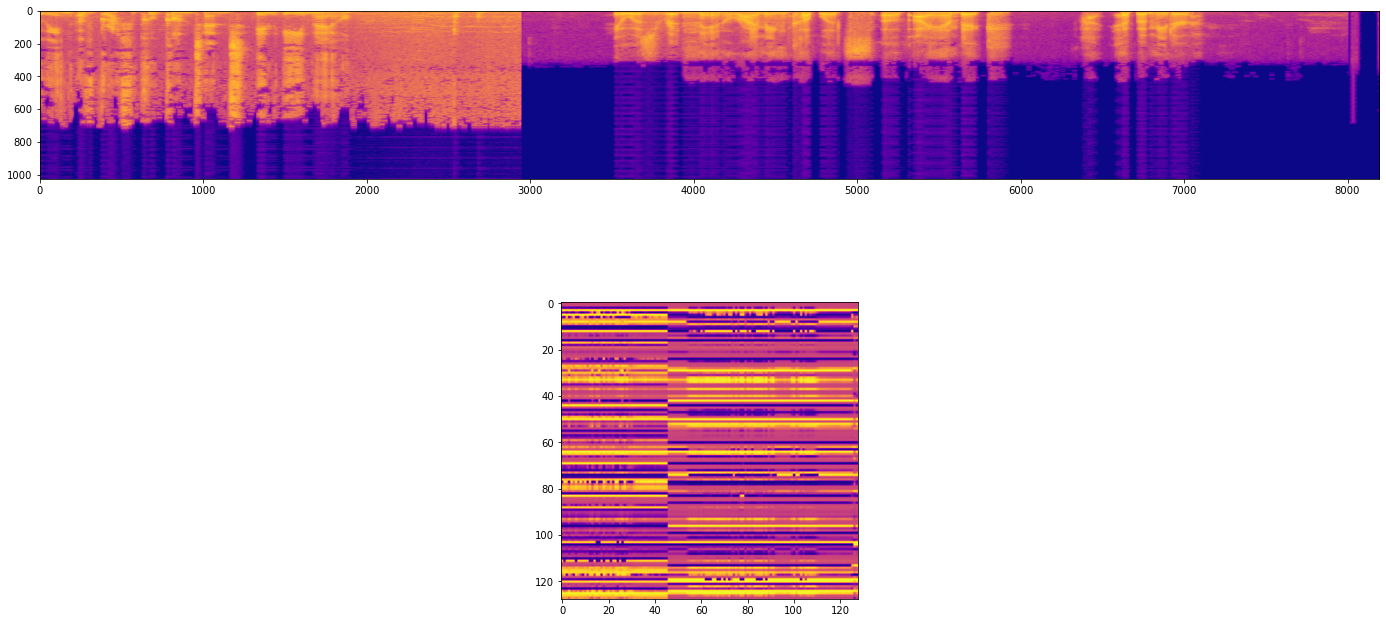

In [5]:
yhat = autoencoder.predict(samples[3], verbose=0)
fig, ax = plt.subplots(nrows=2, figsize=(24, 12))
ax[0].imshow(np.swapaxes(np.vstack(samples[3]), 0, 1), cmap='plasma')
ax[1].imshow(np.swapaxes(np.vstack(yhat), 0, 1), cmap='plasma')
plt.show()